In [28]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Paths to data
dem_path = r'C:\studia\sem2\pytmat_geoscience\exam\dane\DTM\Lubin_2021_06_03.asc'
shapefile_path = r'C:\studia\sem2\pytmat_geoscience\exam\dane\task2\Lubin_2024_03_27_pc_t2.shp'

In [30]:
# Read Shapefile
gdf = gpd.read_file(shapefile_path)

c:\Users\kacpe\.conda\envs\exam\lib\site-packages\pyogrio\raw.py:198: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D Point' is converted to 'Point Z'
  return ogr_read(


In [31]:
# Sample points (max 6666)
sample_size = min(6666, len(gdf))
points_sampled = gdf.sample(n=sample_size, random_state=42)

In [32]:
# Read DEM and sample values
with rasterio.open(dem_path) as src:
    dem_data = src.read(1)
    dem_transform = src.transform
    coords = [(geom.x, geom.y) for geom in points_sampled.geometry]
    dem_values = [val[0] for val in src.sample(coords)]

In [34]:
# Calculate Height Differences
points_sampled["DEM_z"] = dem_values
if points_sampled.geometry.iloc[0].has_z:
    points_sampled["Z_diff"] = points_sampled.geometry.apply(lambda p: p.z) - points_sampled["DEM_z"]

deltaH = points_sampled["Z_diff"]

In [36]:
# Accuracy Metrics
ME = np.mean(deltaH)
MAE = np.mean(np.abs(deltaH))
STD = np.std(deltaH)
RMSE = np.sqrt(np.mean(deltaH**2))

print(f"ME: {ME:.2f} m")
print(f"MAE: {MAE:.2f} m")
print(f"STD: {STD:.2f} m")
print(f"RMSE: {RMSE:.2f} m")

ME: 2.08 m
MAE: 2.39 m
STD: 4.10 m
RMSE: 4.59 m


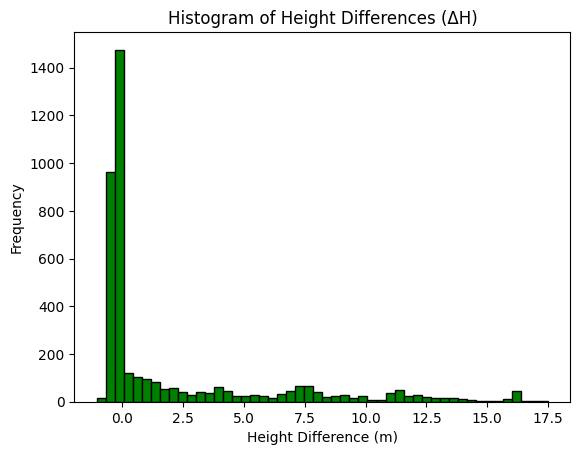

In [38]:
# Visualization
plt.figure()
plt.hist(deltaH.dropna(), bins=50, color='green', edgecolor='black')
plt.title('Histogram of Height Differences (ΔH)')
plt.xlabel('Height Difference (m)')
plt.ylabel('Frequency')
plt.show()